In [1]:
# Nash Cascade Neural Network
# A hydrologically intuitive deep learning network

# Set up a solution to a network of buckets where the number of buckets in each layer
# flows out to the buckets in the next layer
# The parameter on each bucket is the size and height of each spigot.

# Need a function that solves this individually at a single buckets
# Then a function that loops through and moves the water to the downstream buckets

In [2]:
import torch
import matplotlib.pyplot as plt
from ncnn import NashCascadeNeuralNetwork as ncnn
from ncnn import train_theta_values as train_ncnn
from ncn import NashCascadeNetwork as ncn
# Precipitation standard variable name used in the ncnn model interface
PRECIP_SVN = "atmosphere_water__liquid_equivalent_precipitation_rate"
DO_PLOT = True
N_TIMESTEPS = 500

In [3]:
network_precip_input_list = []
count = 0
for i in range(N_TIMESTEPS):

    ###########################################################################
    if count > 39:
        network_precip_input_list.append(1.0)
    else:
        network_precip_input_list.append(0.0)
    if count == 50:
        count = 0
    count+=1
    ###########################################################################
network_precip_tensor = torch.tensor(network_precip_input_list, requires_grad=True)
total_mass_precip_in = torch.sum(network_precip_tensor)

In [4]:
bucket_net = ncn(cfg_file="./config_0.json")
bucket_net.initialize()

Initial Mass in network at start: 100.0
Mass in network: 3.1
Total Mass out of network 205.9
Total precipitation into network 109.0
Mass balance for network is 0.000
Mass balance for network is -0.000


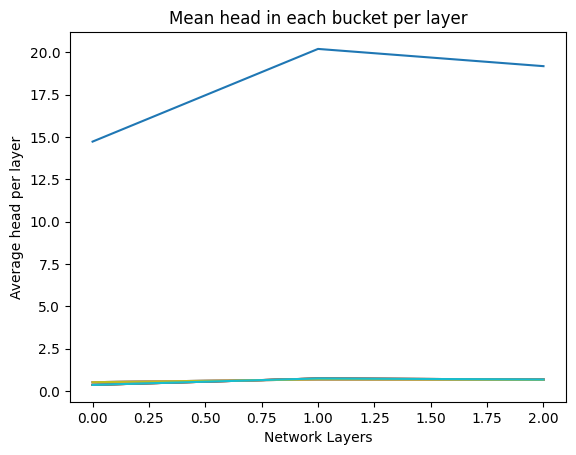

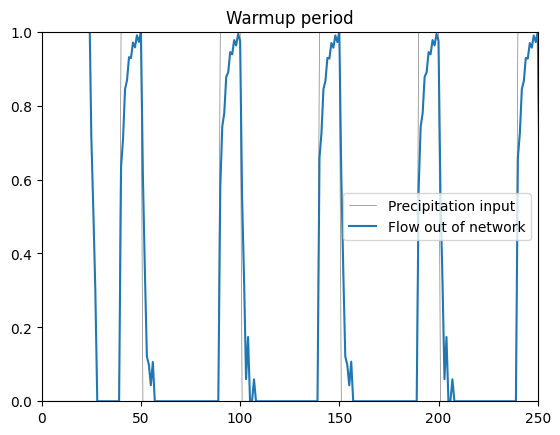

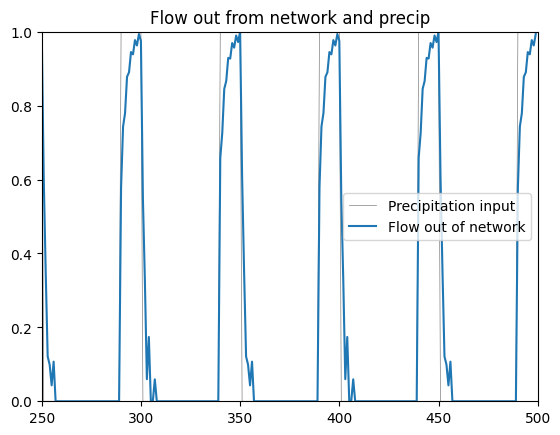

In [5]:
# Example 0
bucket_net = ncn(cfg_file="./config_0.json")
bucket_net.initialize()
bucket_net.summarize_network()
inital_mass_in_network = torch.sum(torch.tensor([tensor.item() for tensor in bucket_net.sum_H_per_layer]))
print(f"Initial Mass in network at start: {inital_mass_in_network:.1f}")
network_outflow_list_0 = []
for i in range(N_TIMESTEPS):

    ###########################################################################
    ###########################################################################
    bucket_net.set_value(PRECIP_SVN, torch.tensor(network_precip_input_list[i], requires_grad=True))
    bucket_net.update_network()
    network_outflow_list_0.append(bucket_net.network_outflow.item())
    bucket_net.summarize_network()
    ###########################################################################
    ###########################################################################

    if DO_PLOT:
        if i % int(N_TIMESTEPS/10) == 0:
            plt.plot([tensor.item() for tensor in bucket_net.mean_H_per_layer])

network_outflow_tensor_0 = torch.tensor(network_outflow_list_0, requires_grad=True)
bucket_net.report_out_mass_balance()
bucket_net.detach_ncn_from_graph()

if DO_PLOT:
    plt.title("Mean head in each bucket per layer")
    plt.ylabel("Average head per layer")
    plt.xlabel("Network Layers")
    plt.show()
    plt.close()

if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, torch.max(torch.tensor(network_precip_input_list[startplt:endplt])).item()])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_0)-(len(network_outflow_list_0)/2))
    endplt = int(len(network_outflow_list_0))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, torch.max(torch.tensor(network_precip_input_list[startplt:endplt])).item()])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

Initial Mass in network at start: 100.0
Mass in network: 2.2
Total Mass out of network 206.8
Total precipitation into network 109.0
Mass balance for network is -0.000
Mass balance for network is -0.000


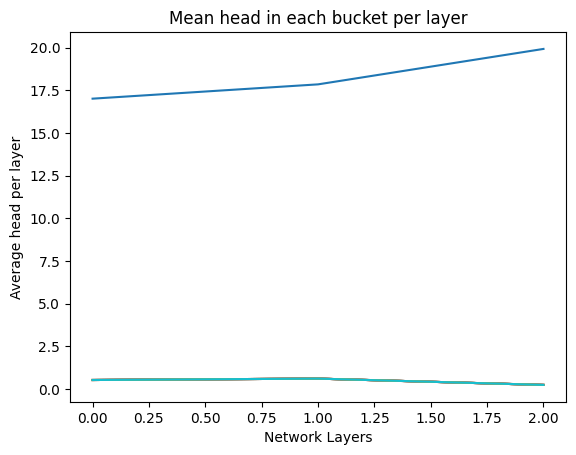

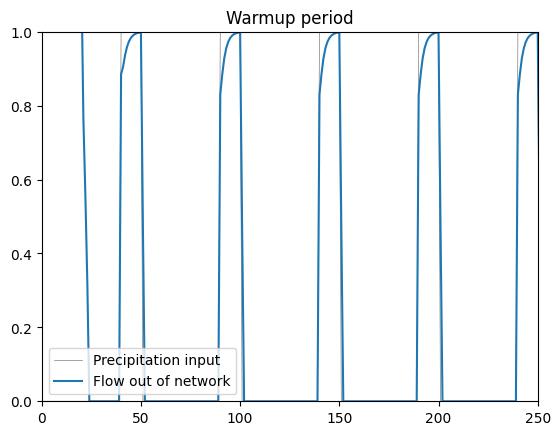

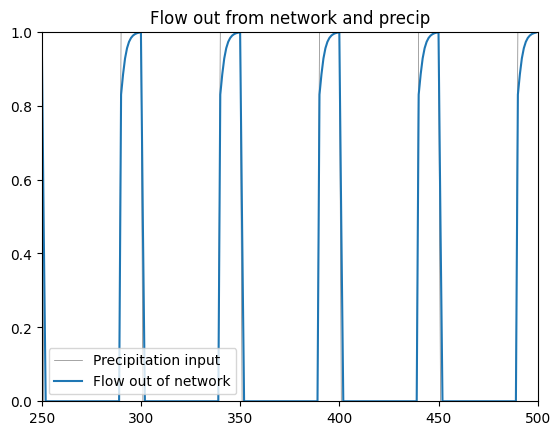

In [6]:
# Example 1
bucket_nn = ncnn(cfg_file="./config_1.json")
inital_mass_in_network = torch.sum(torch.stack(bucket_nn.ncn.sum_H_per_layer)).item()
print(f"Initial Mass in network at start: {inital_mass_in_network:.1f}")
network_outflow_list_1 = []
for i in range(N_TIMESTEPS):

    ###########################################################################
    ###########################################################################
    bucket_nn.ncn.set_value(PRECIP_SVN, torch.tensor(network_precip_input_list[i], requires_grad=True))
    bucket_nn.ncn.update_network()
    network_outflow_list_1.append(bucket_nn.ncn.network_outflow.item())
    bucket_nn.ncn.summarize_network()
    ###########################################################################
    ###########################################################################

    if DO_PLOT:
        if i % int(N_TIMESTEPS/10) == 0:
            plt.plot([tensor.item() for tensor in bucket_nn.ncn.mean_H_per_layer])

###########################################################################
network_outflow_tensor_1 = torch.tensor(network_outflow_list_1, requires_grad=True)
bucket_nn.ncn.report_out_mass_balance()

if DO_PLOT:
    plt.title("Mean head in each bucket per layer")
    plt.ylabel("Average head per layer")
    plt.xlabel("Network Layers")
    plt.show()
    plt.close()

if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_1, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, torch.max(torch.tensor(network_precip_input_list)[startplt:endplt]).item()])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_1)-(len(network_outflow_list_1)/2))
    endplt = int(len(network_outflow_list_1))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_1, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, torch.max(torch.tensor(network_precip_input_list)[startplt:endplt]).item()])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

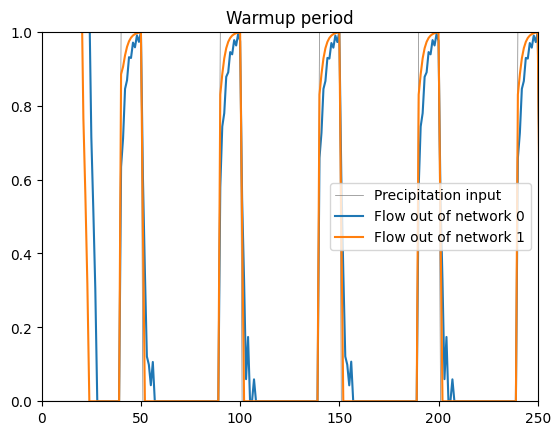

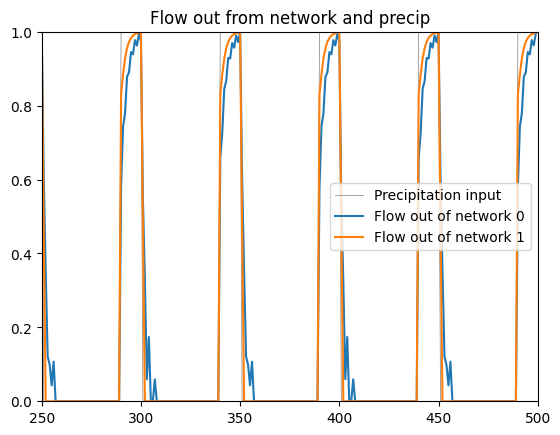

In [7]:
if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    tensor_version = torch.tensor(network_precip_input_list)
    max_val = torch.max(tensor_version[startplt:endplt]).item()
    plt.ylim([0, max_val])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_1)-(len(network_outflow_list_1)/2))
    endplt = int(len(network_outflow_list_1))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    max_value = torch.max(network_precip_tensor[startplt:endplt]).item()
    plt.ylim([0, max_value])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

In [8]:
y_pred, loss = train_ncnn(bucket_nn, "./config_1.json", network_precip_tensor, network_outflow_tensor_0)

network_outflow_list_1 = list(y_pred.detach().numpy())

print(bucket_net.theta.grad)

loss: 0.0391, theta[0].grad[-1][-1][0]: 0.99, theta[0][0][0] is: 0.15
loss: 0.0379, theta[0].grad[-1][-1][0]: 0.96, theta[0][0][0] is: 0.15
loss: 0.0368, theta[0].grad[-1][-1][0]: 0.94, theta[0][0][0] is: 0.15
loss: 0.0358, theta[0].grad[-1][-1][0]: 0.91, theta[0][0][0] is: 0.15
loss: 0.0348, theta[0].grad[-1][-1][0]: 0.88, theta[0][0][0] is: 0.15
loss: 0.0333, theta[0].grad[-1][-1][0]: 1.19, theta[0][0][0] is: 0.15
loss: 0.0303, theta[0].grad[-1][-1][0]: 1.00, theta[0][0][0] is: 0.15
loss: 0.0291, theta[0].grad[-1][-1][0]: 0.94, theta[0][0][0] is: 0.15
loss: 0.0281, theta[0].grad[-1][-1][0]: 0.90, theta[0][0][0] is: 0.14
loss: 0.0271, theta[0].grad[-1][-1][0]: 0.86, theta[0][0][0] is: 0.14
loss: 0.0262, theta[0].grad[-1][-1][0]: 0.83, theta[0][0][0] is: 0.14
loss: 0.0253, theta[0].grad[-1][-1][0]: 0.80, theta[0][0][0] is: 0.14
loss: 0.0246, theta[0].grad[-1][-1][0]: 0.77, theta[0][0][0] is: 0.14
loss: 0.0238, theta[0].grad[-1][-1][0]: 0.75, theta[0][0][0] is: 0.14
loss: 0.0228, theta[

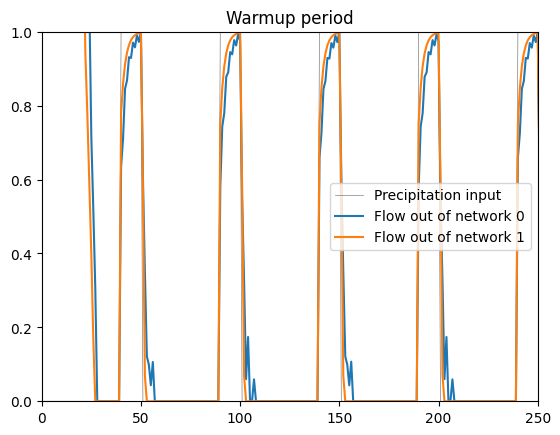

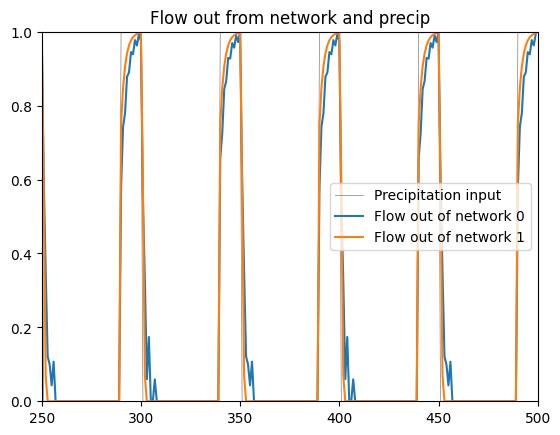

In [9]:
if DO_PLOT:

    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    network_precip_tensor = torch.tensor(network_precip_input_list)
    max_value = torch.max(network_precip_tensor[startplt:endplt]).item()
    plt.ylim([0, max_value])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_1)-(len(network_outflow_list_1)/2))
    endplt = int(len(network_outflow_list_1))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    network_precip_tensor = torch.tensor(network_precip_input_list)
    max_value = torch.max(network_precip_tensor[startplt:endplt]).item()
    plt.ylim([0, max_value])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

In [10]:
bucket_net.network

{0: {'H': tensor([0.3522]),
  'S': tensor([[[0.5846, 0.5564],
           [0.6047, 0.7385]]]),
  's_q': tensor([[0.2773, 0.2173]])},
 1: {'H': tensor([0.7154, 0.7506]),
  'S': tensor([[[0.6205, 0.5483],
           [0.1936, 0.2304]],
  
          [[0.7824, 0.3607],
           [0.3630, 0.3227]]]),
  's_q': tensor([[0.2804, 0.1205],
          [0.1766, 0.1318]])},
 2: {'H': tensor([1.2290, 0.0984]),
  'S': tensor([[[0.8219, 0.6944]],
  
          [[0.2474, 0.8598]]]),
  's_q': tensor([[0.5780],
          [0.4158]])}}

In [11]:
bucket_nn.ncn.network

{0: {'H': tensor([0.5305]),
  'S': tensor([[[0.7576, 0.2793],
           [0.4031, 0.7347]]]),
  's_q': tensor([[0.1072, 0.2261]])},
 1: {'H': tensor([0.6605, 0.5624]),
  'S': tensor([[[0.6826, 0.3051],
           [0.4635, 0.4550]],
  
          [[0.5725, 0.4980],
           [0.9371, 0.6556]]]),
  's_q': tensor([[0.0709, 0.2015],
          [0.3927, 0.0000]])},
 2: {'H': tensor([-0.0406,  0.6854]),
  'S': tensor([[[0.0112, 0.8100]],
  
          [[0.6397, 0.9743]]]),
  's_q': tensor([[0.6295],
          [0.3665]])}}